In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df=pd.read_csv("C:\\Users\\Cmejri\\Desktop\\titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Data Informations

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [170]:
len(df)

1310

In [171]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [172]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [173]:
df.isnull().mean().sort_values(ascending = False)

body         0.907634
cabin        0.774809
boat         0.629008
home.dest    0.431298
age          0.201527
embarked     0.002290
fare         0.001527
ticket       0.000763
parch        0.000763
sibsp        0.000763
sex          0.000763
name         0.000763
survived     0.000763
pclass       0.000763
dtype: float64

# Drop Rows with null values

In [174]:
df.dropna(axis=0,how='all', inplace=True)

In [175]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# Replacing Age,fare and body null Values by their means:

In [176]:
df['age'].fillna(df['age'].mean(), inplace=True )
df['fare'].fillna(df['fare'].mean(), inplace=True)
df['body'].fillna(df['body'].mean(), inplace=True)

# Replace Cabin and Home dist null values by their most frequent values

In [177]:
df['cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
C78                4
                  ..
B61                1
C30                1
E52                1
E77                1
C111               1
Name: cabin, Length: 186, dtype: int64

In [178]:
df['cabin'].fillna('G6', inplace=True)

In [179]:
df["home.dest"].value_counts()

New York, NY                        64
London                              14
Montreal, PQ                        10
Cornwall / Akron, OH                 9
Paris, France                        9
                                    ..
Frankfort, KY                        1
Krakoryd, Sweden Bloomington, IL     1
London / Birmingham                  1
Sweden / Arlington, NJ               1
Sydney, Australia                    1
Name: home.dest, Length: 369, dtype: int64

In [180]:
df['home.dest'].fillna('New York, NY', inplace=True)

In [181]:
df['home.dest'].isnull().sum()

0

# Replace Embarked null values by the mode

In [182]:
df['embarked'].mode()

0    S
dtype: object

In [183]:
df['embarked'].fillna('S',inplace=True)

In [184]:
df['embarked'].isnull().sum()

0

In [185]:
df['boat'].value_counts()

13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
9          25
11         25
16         23
7          23
8          23
D          20
6          20
12         19
2          13
A          11
B           9
1           5
5 7         2
C D         2
13 15       2
8 10        1
15 16       1
5 9         1
13 15 B     1
Name: boat, dtype: int64

In [186]:
df['boat'].head(100)

0       2
1      11
2     NaN
3     NaN
4     NaN
     ... 
95      5
96    NaN
97      6
98      2
99      1
Name: boat, Length: 100, dtype: object

# Corrolation between Sex and Age

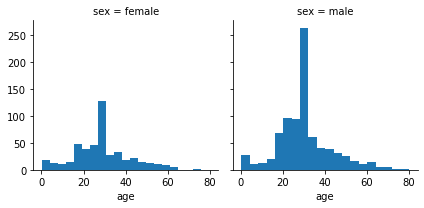

In [187]:
a=sns.FacetGrid(df,col='sex')
a.map(plt.hist,'age',bins=20)

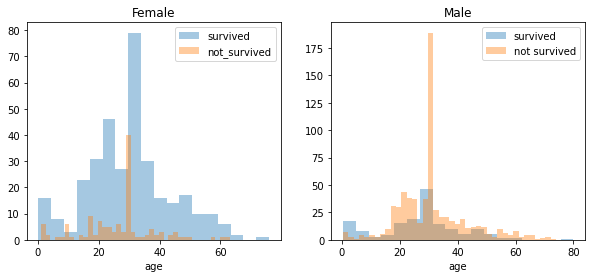

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = df[df['sex']=='female']
male = df[df['sex']=='male']
ax = sns.distplot(female[female['survived']==1].age, bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(female[female['survived']==0].age, bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(male[male['survived']==1].age, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['survived']==0].age, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax = ax.set_title('Male')

# Pclass

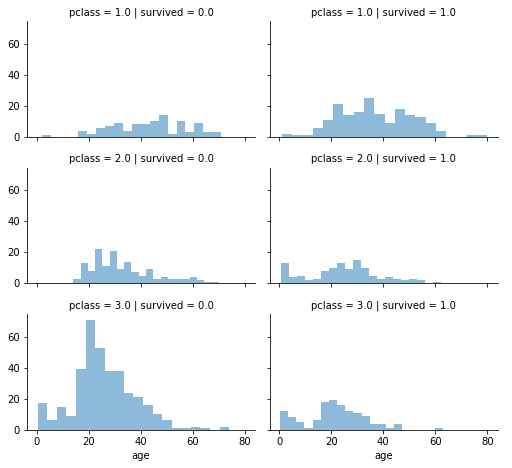

In [195]:
grid = sns.FacetGrid(train_df, col='survived', row='pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

# Function

In [95]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

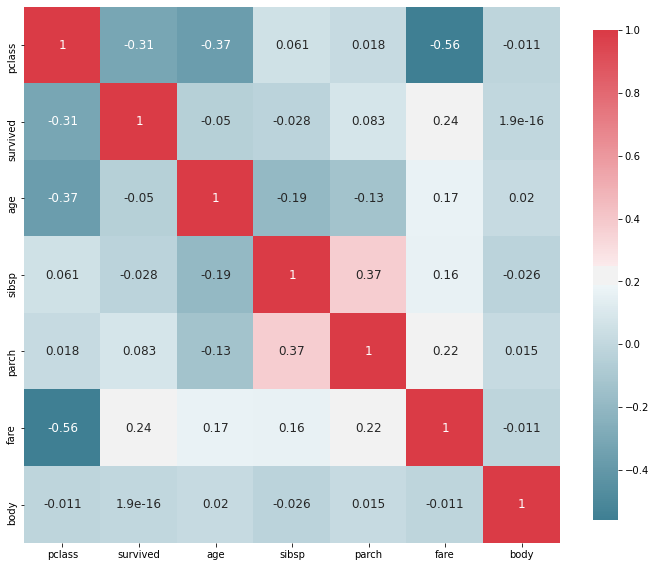

In [96]:
plot_correlation_map( df )

# Relation between pclass and survived using groupby

In [196]:
df[['pclass','survived']].groupby('pclass', as_index=True).mean()

,survived
pclass,
1.0,0.619195
2.0,0.429603
3.0,0.255289


# Adding Column 'Title'

In [210]:
df['Title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand = False)
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Countess      1
Jonkheer      1
Sir           1
Dona          1
Don           1
Capt          1
Lady          1
Name: Title, dtype: int64

# Visualise the correlation between Title and Sex

In [211]:
#let's start by encoder the sex feature:
sex_dict={'sex':{"female":0, "male":1}}
df.replace(sex_dict, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [212]:
df['sex'].value_counts()

1    843
0    466
Name: sex, dtype: int64

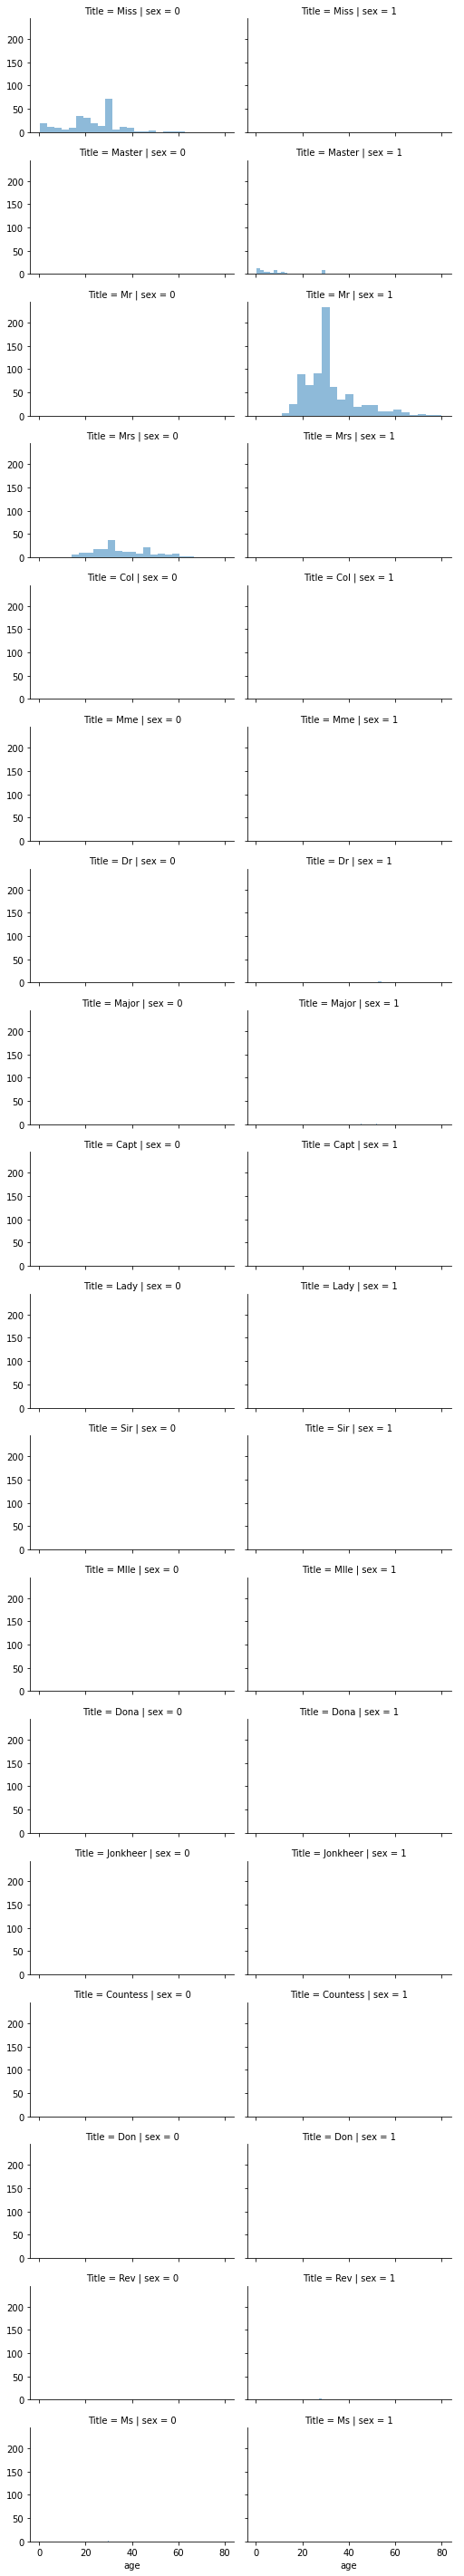

In [214]:
grid = sns.FacetGrid(df, col='sex', row='Title', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [215]:
df['Title'].unique().tolist()

['Miss',
 'Master',
 'Mr',
 'Mrs',
 'Col',
 'Mme',
 'Dr',
 'Major',
 'Capt',
 'Lady',
 'Sir',
 'Mlle',
 'Dona',
 'Jonkheer',
 'Countess',
 'Don',
 'Rev',
 'Ms']

In [216]:
Title_Dictionary = {"Title":{"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer", "Jonkheer":"Royalty",
"Don":"Royalty","Sir" :"Royalty","Lady" :"Royalty","the Countess": "Royalty","Dona": "Royalty","Mme":"Miss","Mlle": "Miss",
"Miss" :"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" : "Mrs", "Master" :"Master"}}

In [217]:
df.replace(Title_Dictionary, inplace=True)

In [218]:
df['Title'].value_counts()

Mrs         956
Miss        263
Master       61
Officer      23
Royalty       5
Countess      1
Name: Title, dtype: int64

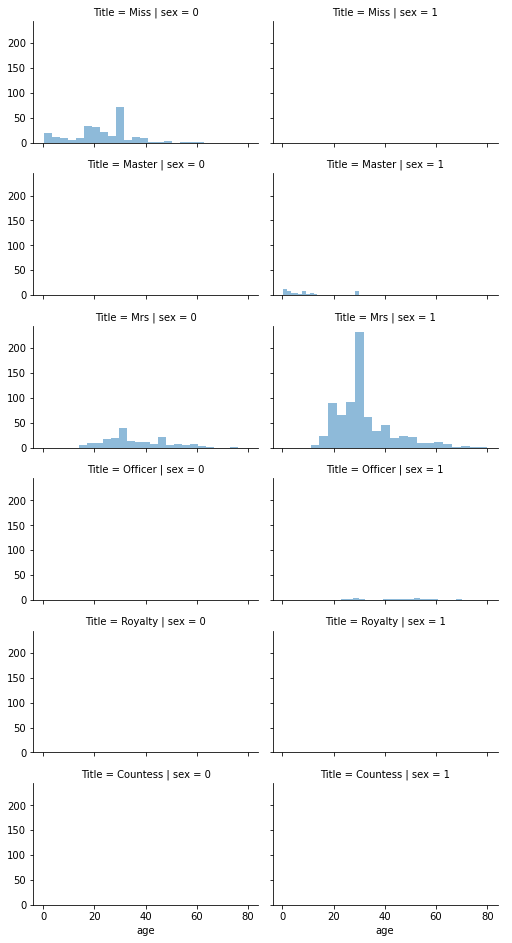

In [219]:
grid = sns.FacetGrid(df, col='sex', row='Title', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

# Create new feature FamilySize

In [220]:
df['FamilySize']=df['parch']+df['sibsp']

In [221]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,FamilySize
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO",Miss,0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON",Master,3.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",Miss,3.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON",Mrs,3.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",Mrs,3.0


In [222]:
df['FamilySize'].value_counts()

0.0     790
1.0     235
2.0     159
3.0      43
5.0      25
4.0      22
6.0      16
10.0     11
7.0       8
Name: FamilySize, dtype: int64

In [223]:
df[['FamilySize','survived']].groupby('FamilySize', as_index=True).mean()

,survived
FamilySize,
0.0,0.302532
1.0,0.536170
2.0,0.566038
3.0,0.697674
4.0,0.272727
5.0,0.200000
6.0,0.250000
7.0,0.000000
10.0,0.000000
